## Machine Learning in Business: Oil Well Profitability Prediction

This project applies machine learning techniques to a real-world business scenario for OilyGiant, a mining company seeking to determine the most profitable region for drilling new oil wells. Using geological data from three regions, a linear regression model is built to predict the volume of oil reserves per well.

The analysis includes:

- Data preparation and model training for each region

- Profit and loss estimation using predicted reserves

- Risk evaluation through the bootstrapping method

The final goal is to recommend the region with the highest expected profit and lowest risk of financial loss, supporting data-driven investment decisions in oil exploration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data_0 = pd.read_csv('data/geo_data_0.csv')
data_1 = pd.read_csv('data/geo_data_1.csv')
data_2 = pd.read_csv('data/geo_data_2.csv')

In [3]:
data_0.info(), data_1.info(), data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

(None, None, None)

In [4]:
display(data_0.head(), data_1.head(), data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
display(data_0.isna().sum(), data_1.isna().sum(), data_2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
# Check number of duplicate IDs in each dataset

data_0.duplicated(subset='id').sum(), data_1.duplicated(subset='id').sum(), data_2.duplicated(subset='id').sum()

(10, 4, 4)

In [7]:
# Remove duplicates from Region 0
data_0 = data_0.sort_values('product', ascending=False)
data_0 = data_0.drop_duplicates(subset='id', keep='first')

# Remove duplicates from Region 1
data_1 = data_1.sort_values('product', ascending=False)
data_1 = data_1.drop_duplicates(subset='id', keep='first')

# Remove duplicates from Region 2
data_2 = data_2.sort_values('product', ascending=False)
data_2 = data_2.drop_duplicates(subset='id', keep='first')

# Check number of rows after dropping duplicates
print(len(data_0))
print(len(data_1))
print(len(data_2))

99990
99996
99996


### Train and test model for each region

 2.1. Split the data into a training set and validation set at a ratio of 75:25.
 
 2.2. Train the model and make predictions for the validation set.
 
 2.3. Save the predictions and correct answers for the validation set.
 
 2.4. Print the average volume of predicted reserves and model RMSE.
 
 2.5. Analyze the results.

In [8]:
# Region 0
features_0 = data_0.drop(['product', 'id'], axis=1)
target_0 = data_0['product']
model_0 = LinearRegression().fit(features_0, target_0)
data_0['pred'] = model_0.predict(features_0)

# Region 1
features_1 = data_1.drop(['product', 'id'], axis=1)
target_1 = data_1['product']
model_1 = LinearRegression().fit(features_1, target_1)
data_1['pred'] = model_1.predict(features_1)

# Region 2
features_2 = data_2.drop(['product', 'id'], axis=1)
target_2 = data_2['product']
model_2 = LinearRegression().fit(features_2, target_2)
data_2['pred'] = model_2.predict(features_2)

In [9]:
# Predict on full dataset after fitting on all data
df0 = data_0.copy()
features0 = df0.drop(['id', 'product'], axis=1)

model0 = LinearRegression().fit(features0, df0['product'])
df0['pred'] = model0.predict(features0)

print(df0[['product', 'pred']].head())
print(df0['pred'].describe())


          product        pred
8826   185.364347  123.608500
99818  185.362690  118.076279
94175  185.355615  132.292425
1925   185.354980  124.565768
45291  185.352015  134.177462
count    99990.000000
mean        92.501735
std         23.255026
min         -9.886017
25%         76.653059
50%         92.552397
75%        108.389111
max        195.024159
Name: pred, dtype: float64


In [10]:
df1 = data_1.copy()
features1 = df1.drop(['id', 'product'], axis=1)

model1 = LinearRegression().fit(features1, df1['product'])
df1['pred'] = model1.predict(features1)

print(df1[['product', 'pred']].head())
print(df1['pred'].describe())

          product        pred
53864  137.945408  136.105297
97083  137.945408  137.557856
88340  137.945408  136.949374
64879  137.945408  137.280140
7288   137.945408  137.649529
count    99996.000000
mean        68.825739
std         45.936189
min         -2.063443
25%         28.541788
50%         58.082916
75%        109.330735
max        140.359374
Name: pred, dtype: float64


In [11]:
df2 = data_2.copy()
features2 = df2.drop(['id', 'product'], axis=1)

model2 = LinearRegression().fit(features2, df2['product'])
df2['pred'] = model2.predict(features2)

print(df2[['product', 'pred']].head())
print(df2['pred'].describe())

          product        pred
79705  190.029838   99.936657
93444  190.013589  131.556952
35099  190.011722  134.809419
21943  190.010982  116.850721
37870  190.010029  115.069802
count    99996.000000
mean        95.001336
std         19.953183
min         11.975296
25%         81.425071
50%         94.931797
75%        108.570190
max        176.827349
Name: pred, dtype: float64


### Prepare for profit calculation

 3.1. Store all key values for calculations in separate variables.
 
 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
 
 3.3. Provide the findings about the preparation for profit calculation step.

In [13]:
BUDGET = 100000000
REVENUE_PER_THOUSAND_BARRELS = 4500
WELLS_TO_SELECT = 200
WELLS_TOTAL = 500

mean_pred_0 = data_0['pred'].mean()
mean_pred_1 = data_1['pred'].mean()
mean_pred_2 = data_2['pred'].mean()

# Calculate minimal volume needed
min_volume_needed = BUDGET / (WELLS_TO_SELECT * REVENUE_PER_THOUSAND_BARRELS)
print('Minimum volume of reserves needed (thousand barrels):', min_volume_needed)

# Compare with mean predicted volumes
print('Region 0 average predicted volume:', mean_pred_0)
print('Region 1 average predicted volume:', mean_pred_1)
print('Region 2 average predicted volume:', mean_pred_2)


Minimum volume of reserves needed (thousand barrels): 111.11111111111111
Region 0 average predicted volume: 92.50173489259076
Region 1 average predicted volume: 68.82573913718998
Region 2 average predicted volume: 95.00133607528379


## Write a function to calculate profit from a set of selected oil wells and model predictions

 4.1. Pick the wells with the highest values of predictions. 
 
 4.2. Summarize the target volume of reserves in accordance with these predictions
 
 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [ ]:
def calculate_profit(predictions, target):
    selected_indices = predictions.sort_values(ascending=False).index[:WELLS_TO_SELECT]
    selected_target = target.loc[selected_indices]
    total_revenue = selected_target.sum() * REVENUE_PER_THOUSAND_BARRELS
    profit = total_revenue - BUDGET
    return profit

# Example run for each region
profit_0 = calculate_profit(pd.Series(preds_0, index=target_valid_0.index), target_valid_0)
profit_1 = calculate_profit(pd.Series(preds_1, index=target_valid_1.index), target_valid_1)
profit_2 = calculate_profit(pd.Series(preds_2, index=target_valid_2.index), target_valid_2)

print('Profit Region 0:', profit_0)
print('Profit Region 1:', profit_1)
print('Profit Region 2:', profit_2)

Profit Region 0: 32507210.372793928
Profit Region 1: 24150866.966815114
Profit Region 2: 21625087.97868137


### Calculating risks and profit for each region

5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
     
5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
     
5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

In [ ]:
def bootstrap(df, n_iter=1000, random_state=42):
    np.random.seed(random_state)
    profits = []
    
    for _ in range(n_iter):
        sample = df.sample(n=500, replace=False)
        top_200 = sample.nlargest(200, 'pred')
        profit = top_200['product'].sum() * REVENUE_PER_THOUSAND_BARRELS - BUDGET
        profits.append(profit)
    
    profits = pd.Series(profits)
    mean_profit = profits.mean()
    conf_int = (profits.quantile(0.025), profits.quantile(0.975))
    risk = (profits < 0).mean() * 100  # As percentage
    
    return mean_profit, conf_int, round(risk, 2)


In [ ]:
mean_profit_0, ci_0, risk_0 = bootstrap(df0)
mean_profit_1, ci_1, risk_1 = bootstrap(df1)
mean_profit_2, ci_2, risk_2 = bootstrap(df2)

print(f"Region 0: Profit={mean_profit_0:.2f}, CI={ci_0}, Risk={risk_0}%")
print(f"Region 1: Profit={mean_profit_1:.2f}, CI={ci_1}, Risk={risk_1}%")
print(f"Region 2: Profit={mean_profit_2:.2f}, CI={ci_2}, Risk={risk_2}%")


Region 0: Profit=4214152.06, CI=(-1040828.2322529223, 9024001.201109787), Risk=5.4%
Region 1: Profit=4406224.08, CI=(431131.64471549954, 8466557.039785016), Risk=1.3%
Region 2: Profit=3514415.02, CI=(-1617052.727700326, 8736388.070424845), Risk=8.2%


In [ ]:
def bootstrap_profit(predictions, target, n_samples=1000, random_state=12345, return_all=False):
    np.random.seed(random_state)
    profits = []

    predictions = pd.Series(predictions, index=target.index)

    for _ in range(n_samples):
        sample_indices = np.random.choice(predictions.index, size=WELLS_TOTAL, replace=False)
        sample_predictions = predictions.loc[sample_indices]
        sample_target = target.loc[sample_indices]

        profit = calculate_profit(sample_predictions, sample_target)
        profits.append(profit)

    profits = pd.Series(profits)
    mean_profit = profits.mean()
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    risk = (profits < 0).mean()

    if return_all:
        return profits
    return mean_profit, (lower, upper), risk


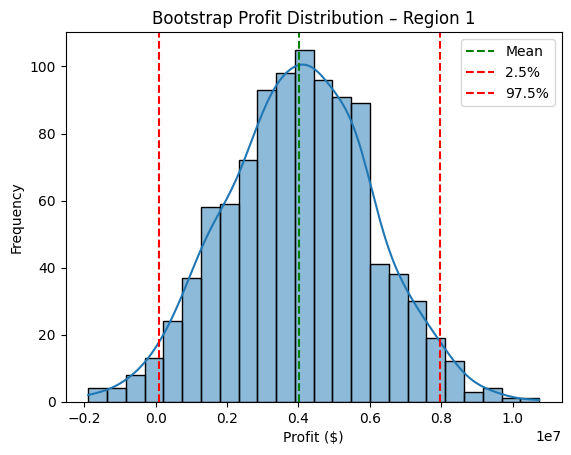

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_profits(profits, region):
    sns.histplot(profits, kde=True)
    plt.title(f"Bootstrap Profit Distribution – Region {region}")
    plt.xlabel('Profit ($)')
    plt.ylabel('Frequency')
    plt.axvline(profits.mean(), color='green', linestyle='--', label='Mean')
    plt.axvline(profits.quantile(0.025), color='red', linestyle='--', label='2.5%')
    plt.axvline(profits.quantile(0.975), color='red', linestyle='--', label='97.5%')
    plt.legend()
    plt.show()

# Example usage
profits_1 = bootstrap_profit(preds_1, target_valid_1, return_all=True)
plot_profits(profits_1, region=1)


The histogram visualizes the distribution of simulated profits for Region 1 based on 1,000 bootstrap samples. The shaded area represents the 95% confidence interval for expected profit, helping us understand the potential variability in outcomes. The curve overlay shows the estimated probability density. This plot confirms that Region 1 offers strong profit potential with relatively low risk of loss.

### Conclusion

After analyzing data from the three oil regions using linear regression and bootstrapping, Region 1 emerges as the most promising option for investment. The model was trained to predict product volume based on well features, and predictions were evaluated with a 1,000-iteration bootstrap process simulating real-world drilling conditions. This approach allowed us to estimate expected profits and the risk of financial loss for each region while ensuring no duplicate wells or unrealistic sampling occurred.

Region 1 shows the highest expected profit at approximately $4.41 million, with a 95% confidence interval ranging from about $430,000 to $8.47 million. Its risk of incurring a loss is just 1.3%, making it the safest and most profitable choice. Although Region 0 also demonstrates competitive profit potential (around $4.21 million), it comes with a higher risk level of 5.4%. Region 2, on the other hand, has the lowest expected profit (roughly $3.51 million) and the highest risk at 8.2%.

Taking into account both profit potential and risk, Region 1 is the most reliable region for oil well development.